In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('../단기모멘텀.csv', dtype={'ticker':str})
df1

,date,시가,고가,저가,종가,거래량,등락률,ticker,ret_1d,ret_5d,ret_20d
0,2015-01-02,23100,23100,22350,22600,184419,-2.795699,000080,NaN,NaN,NaN
1,2015-01-05,22600,23150,22400,23050,170602,1.991150,000080,0.019912,NaN,NaN
2,2015-01-06,22750,23100,22550,22650,142141,-1.735358,000080,-0.017354,NaN,NaN
3,2015-01-07,22650,23050,22350,22700,159007,0.220751,000080,0.002208,NaN,NaN
4,2015-01-08,22600,23100,22600,22850,126066,0.660793,000080,0.006608,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
443040,2024-12-23,29100,30100,29050,29550,888310,2.961672,489790,0.029617,-0.166432,-0.245211
443041,2024-12-24,29950,31350,29100,30400,984329,2.876481,489790,0.028765,-0.136364,-0.181696
443042,2024-12-26,30900,31450,30300,30600,557107,0.657895,489790,0.006579,-0.102639,-0.111756
443043,2024-12-27,30150,32100,29700,31150,991359,1.797386,489790,0.017974,-0.020440,-0.103597


In [3]:
df2 = pd.read_csv('../24.12_수급,거래 데이터.csv', dtype={'ticker':str})
df2

,date,기관_순매수_수량,개인_순매수_수량,외국인_순매수_수량,기관_순매수_금액,개인_순매수_금액,외국인_순매수_금액,ticker
0,2015-01-02,-20583,-5925,21466,-27448674000,-7894072000,28661116000,005930
1,2015-01-02,-386,-120,-254,-42528500,-12981500,-29541000,081660
2,2015-01-02,-18542,3887,14775,-2961457500,618899500,2361638000,011170
3,2015-01-02,37829,-42088,3202,2448649700,-2724920700,208450900,004020
4,2015-01-02,-48774,52045,-3006,-2877642700,3065262700,-171978900,066570
...,...,...,...,...,...,...,...,...
441259,2024-12-30,6317,-4052,-2175,265011350,-169348600,-91903750,111770
441260,2024-12-30,14331,-5451,-8889,1210694000,-462952200,-748486700,000120
441261,2024-12-30,-138785,253017,-113510,-5318526450,9752750850,-4404797250,035720
441262,2024-12-30,47818,-50146,3054,12056720000,-12697136000,824242000,051910


In [ ]:
# 1. 날짜 컬럼을 datetime 형식으로 통일 (오류 방지)
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])

In [5]:
# df1(가격 정보)을 기준으로 df2(수급 정보)를 병합
merged_df = pd.merge(df1, df2, on=['date', 'ticker'], how='left')

# 결과 확인
print(f"df1 길이: {len(df1)}")
print(f"df2 길이: {len(df2)}")
print(f"병합된 데이터 길이: {len(merged_df)}")

df1 길이: 443045
df2 길이: 441264
병합된 데이터 길이: 443045


In [6]:
# 수급 관련 컬럼 리스트 (df2에 있던 컬럼들)
investor_cols = [
    '기관_순매수_수량', '개인_순매수_수량', '외국인_순매수_수량',
    '기관_순매수_금액', '개인_순매수_금액', '외국인_순매수_금액'
]

# 결측치를 0으로 채우기
merged_df[investor_cols] = merged_df[investor_cols].fillna(0)

# 데이터 확인
display(merged_df.head())

,date,시가,고가,저가,종가,거래량,등락률,ticker,ret_1d,ret_5d,ret_20d,기관_순매수_수량,개인_순매수_수량,외국인_순매수_수량,기관_순매수_금액,개인_순매수_금액,외국인_순매수_금액
0,2015-01-02,23100,23100,22350,22600,184419,-2.795699,000080,NaN,NaN,NaN,5000.0,15122.0,-20122.0,1.141317e+08,343190350.0,-457322050.0
1,2015-01-05,22600,23150,22400,23050,170602,1.991150,000080,0.019912,NaN,NaN,30713.0,-24478.0,240.0,7.027537e+08,-562542500.0,7207350.0
2,2015-01-06,22750,23100,22550,22650,142141,-1.735358,000080,-0.017354,NaN,NaN,-656.0,12773.0,-9046.0,-1.292970e+07,286978450.0,-204244150.0
3,2015-01-07,22650,23050,22350,22700,159007,0.220751,000080,0.002208,NaN,NaN,6944.0,-13387.0,6443.0,1.577346e+08,-303838950.0,146104300.0
4,2015-01-08,22600,23100,22600,22850,126066,0.660793,000080,0.006608,NaN,NaN,-48235.0,15447.0,31808.0,-1.098155e+09,348779800.0,726834950.0


In [8]:
import pandas as pd
import numpy as np

# 1. 데이터 준비 (기존 merged_df 복사)
# date, ticker, 시가, 고가, 저가, 종가, 거래량, 기관/외국인 수급 컬럼이 있다고 가정
df = merged_df.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['ticker', 'date'])

# -----------------------------------------------------------
# [섹션 A] 추세 및 모멘텀 지표 (Trend & Momentum)
# : 주가가 오르는 힘과 방향을 측정
# -----------------------------------------------------------

# 1. 이동평균 이격도 (Disparity)
# 현재 주가가 5일/20일/60일/120일 평균 대비 얼마나 높은가? (1.0 이상이면 평균 위)
for w in [5, 20, 60, 120]:
    ma = df.groupby('ticker')['종가'].rolling(window=w).mean().reset_index(0, drop=True)
    df[f'disparity_{w}'] = df['종가'] / ma

# 2. RSI (상대강도지수, 14일)
# 0~100 사이 값. 70 이상 과매수, 30 이하 과매도
def calc_rsi(x, window=14):
    delta = x.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / (loss + 1e-9) # 0 나누기 방지
    return 100 - (100 / (1 + rs))

df['rsi_14'] = df.groupby('ticker')['종가'].transform(lambda x: calc_rsi(x))

# 3. MACD & Signal (추세 전환 포착)
# MACD 선이 Signal 선을 돌파할 때가 매수/매도 타이밍
def calc_macd_oscillator(x):
    exp12 = x.ewm(span=12, adjust=False).mean()
    exp26 = x.ewm(span=26, adjust=False).mean()
    macd = exp12 - exp26
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd - signal # 오실레이터 (히스토그램)

df['macd_osc'] = df.groupby('ticker')['종가'].transform(lambda x: calc_macd_oscillator(x))

# 4. 스토캐스틱 (Stochastic Fast %K) - 단기 파동 확인
def calc_stochastic_k(df_grp, window=14):
    low_min = df_grp['저가'].rolling(window=window).min()
    high_max = df_grp['고가'].rolling(window=window).max()
    k = ((df_grp['종가'] - low_min) / (high_max - low_min + 1e-9)) * 100
    return k

# groupby().apply() 대신 transform 사용을 위해 함수 구조 조정 필요하나,
# 성능상 반복문 없이 처리하기 위해 아래 방식 사용
df['low_14'] = df.groupby('ticker')['저가'].rolling(window=14).min().reset_index(0, drop=True)
df['high_14'] = df.groupby('ticker')['고가'].rolling(window=14).max().reset_index(0, drop=True)
df['stoch_k'] = ((df['종가'] - df['low_14']) / (df['high_14'] - df['low_14'] + 1e-9)) * 100

# -----------------------------------------------------------
# [섹션 B] 변동성 지표 (Volatility)
# : 주가가 얼마나 요동치는지(리스크) 측정
# -----------------------------------------------------------

# 5. 볼린저 밴드 (Bollinger Bands) 위치값 (%b)
# 주가가 밴드 상단(1.0)에 있는지 하단(0.0)에 있는지 확인
def calc_bollinger_pb(x, window=20):
    ma = x.rolling(window=window).mean()
    std = x.rolling(window=window).std()
    upper = ma + (std * 2)
    lower = ma - (std * 2)
    pb = (x - lower) / (upper - lower + 1e-9)
    return pb

df['bollinger_pb'] = df.groupby('ticker')['종가'].transform(lambda x: calc_bollinger_pb(x))

# 6. 일일 변동성 (최근 5일간 등락폭의 표준편차)
df['volatility_5'] = df.groupby('ticker')['등락률'].rolling(window=5).std().reset_index(0, drop=True)

# -----------------------------------------------------------
# [섹션 C] 수급 지표 (Supply & Demand) - 매우 중요
# : 외국인/기관이 실제로 사고 있는지 확인
# -----------------------------------------------------------

# 7. 수급 주체별 누적 순매수 (Accumulated Net Buying)
# 단기(5일), 중기(20일), 장기(60일) 동안 얼마나 모았나?
investor_cols = ['외국인_순매수_금액', '기관_순매수_금액', '개인_순매수_금액']

for col in investor_cols:
    # 절대 금액은 종목별 시총 차이가 크므로, 로그 변환하거나 스케일링이 필요하지만
    # 여기서는 '방향성'을 보기 위해 20일 이동평균 대비 현재 수급 강도로 변환
    # (단순 누적은 주가가 계속 오르면 값도 계속 커지는 문제가 있음)
    
    # 전략: 최근 5일/20일 누적 순매수 금액
    df[f'{col}_sum_5'] = df.groupby('ticker')[col].rolling(window=5).sum().reset_index(0, drop=True)
    df[f'{col}_sum_20'] = df.groupby('ticker')[col].rolling(window=20).sum().reset_index(0, drop=True)

# 8. 거래량 회전율 (Volume Ratio)
# 최근 5일 평균 거래량이 60일 평균 대비 얼마나 터졌나? (거래량 급증 포착)
vol_5 = df.groupby('ticker')['거래량'].rolling(window=5).mean().reset_index(0, drop=True)
vol_60 = df.groupby('ticker')['거래량'].rolling(window=60).mean().reset_index(0, drop=True)
df['volume_ratio'] = vol_5 / (vol_60 + 1e-9)

# -----------------------------------------------------------
# [섹션 D] 타겟 생성 (Target) & 정리
# -----------------------------------------------------------

# 9. 타겟: 향후 10일 수익률 (Shift -10)
df['target_10d'] = df.groupby('ticker')['종가'].shift(-10) / df['종가'] - 1

# 10. 백테스트용 내일 수익률 (Shift -1)
# 모델이 오늘 예측하면, 실제 수익은 내일 종가 기준 등으로 발생
df['next_day_ret'] = df.groupby('ticker')['종가'].pct_change().shift(-1)

# 불필요한 중간 계산 컬럼 제거 (선택)
drop_cols = ['low_14', 'high_14'] 
df = df.drop(columns=drop_cols)

# 모델에 넣을 최종 Feature 리스트 정의
features = [
    # 추세
    'disparity_5', 'disparity_20', 'disparity_60', 'disparity_120',
    'rsi_14', 'macd_osc', 'stoch_k',
    # 변동성
    'bollinger_pb', 'volatility_5',
    # 수급 (금액 데이터가 있는 경우)
    '외국인_순매수_금액_sum_5', '외국인_순매수_금액_sum_20',
    '기관_순매수_금액_sum_5', '기관_순매수_금액_sum_20',
    '개인_순매수_금액_sum_5', '개인_순매수_금액_sum_20',
    # 거래량
    'volume_ratio'
]

# 결측치(NaN) 확인
print(f"생성된 컬럼 수: {len(features)}")
print("결측치 제거 전 데이터 길이:", len(df))
df_clean = df.dropna(subset=features + ['target_10d'])
print("결측치 제거(이동평균 등) 후 데이터 길이:", len(df_clean))

# 결과 확인
print("\n--- 생성된 주요 Feature 예시 ---")
display(df_clean[['date', 'ticker'] + features[:5]].head())

생성된 컬럼 수: 16
결측치 제거 전 데이터 길이: 443045
결측치 제거(이동평균 등) 후 데이터 길이: 417311

--- 생성된 주요 Feature 예시 ---


,date,ticker,disparity_5,disparity_20,disparity_60,disparity_120,rsi_14
119,2015-06-26,000080,1.019010,1.067748,1.017548,1.014748,70.754717
120,2015-06-29,000080,0.989903,1.042775,0.995146,0.992754,60.952381
121,2015-06-30,000080,0.991247,1.044019,0.999559,0.997303,61.682243
122,2015-07-01,000080,1.002633,1.048887,1.008385,1.006035,59.000000
123,2015-07-02,000080,0.988551,1.026990,0.991827,0.988515,61.458333


Train 데이터: 186,357건
Validation 데이터: 89,832건
Test 데이터: 141,122건

--- 모델 학습 시작 (Early Stopping 적용) ---
[0]	validation_0-rmse:0.07061	validation_1-rmse:0.10291
[100]	validation_0-rmse:0.06971	validation_1-rmse:0.10222
[200]	validation_0-rmse:0.06915	validation_1-rmse:0.10203
[300]	validation_0-rmse:0.06870	validation_1-rmse:0.10204
[313]	validation_0-rmse:0.06864	validation_1-rmse:0.10205

최적의 반복 횟수: 263

=== 최종 모델 성능 평가 ===
Test 기간 순위 상관계수 (IC): 0.0421
(양수면 예측 순위와 실제 수익률 순위가 비슷하다는 뜻)


c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

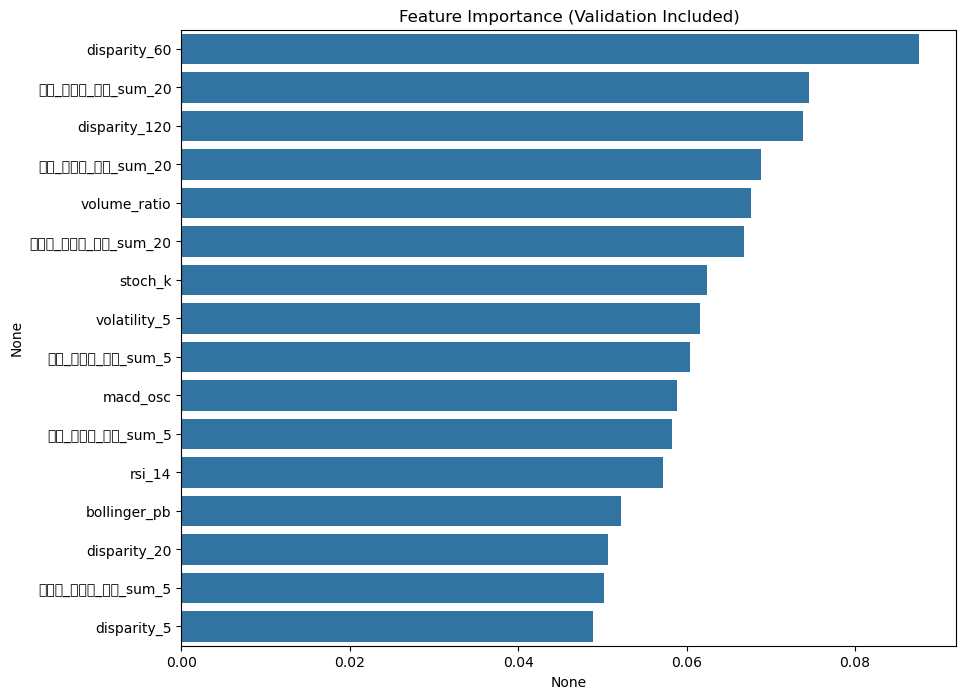

In [13]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. y값 생성 (사용자님 방식 적용) & 데이터 준비
# -----------------------------------------------------------
# 앞서 만든 피처들이 df에 들어있다고 가정합니다.
# [사용자님 식 적용] 10일 후 미래 가격 / 오늘 가격 - 1
df['target_10d'] = df.groupby('ticker')['종가'].shift(-10) / df['종가'] - 1


# 모델에 넣을 피처(X) 선택 (이전에 만든 20여개 컬럼)
features = [
    'disparity_5', 'disparity_20', 'disparity_60', 'disparity_120',
    'rsi_14', 'macd_osc', 'stoch_k', 'bollinger_pb', 'volatility_5',
    '외국인_순매수_금액_sum_5', '외국인_순매수_금액_sum_20',
    '기관_순매수_금액_sum_5', '기관_순매수_금액_sum_20',
    '개인_순매수_금액_sum_5', '개인_순매수_금액_sum_20',
    'volume_ratio'
]

# 결측치(NaN) 제거 (Target이 없는 최근 10일치 데이터 등 삭제)
model_df = df.dropna(subset=features + ['target_10d'])

# -----------------------------------------------------------
# 2. 데이터 분할 (Train / Validation / Test) - 기획서 준수
# -----------------------------------------------------------
# Train (학습용): 2015 ~ 2019 (5년) -> 과거 패턴 공부
train = model_df[model_df['date'].between('2015-01-01', '2019-12-31')]

# Validation (검증용): 2020 ~ 2021 (2년) -> 모의고사 (튜닝 & 과적합 방지)
val = model_df[model_df['date'].between('2020-01-01', '2021-12-31')]

# Test (평가용): 2022 ~ 2024 (3년) -> 수능 (실전 성과 측정)
test = model_df[model_df['date'].between('2022-01-01', '2024-12-31')]

print(f"Train 데이터: {len(train):,}건")
print(f"Validation 데이터: {len(val):,}건")
print(f"Test 데이터: {len(test):,}건")

# X, y 분리
X_train, y_train = train[features], train['target_10d']
X_val, y_val = val[features], val['target_10d']
X_test, y_test = test[features], test['target_10d']

# -----------------------------------------------------------
# 3. XGBoost 모델 학습 (Validation 적용)
# -----------------------------------------------------------
model = XGBRegressor(
    n_estimators=1000,      # 공부할 반복 횟수 (최대 1000번)
    learning_rate=0.01,     # 학습 속도 (천천히 꼼꼼하게)
    max_depth=6,            # 의사결정나무 깊이
    subsample=0.8,          # 데이터의 80%만 무작위로 사용 (다양성 확보)
    colsample_bytree=0.8,   # 컬럼의 80%만 사용
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50 # [핵심] 50번 반복해도 성적이 안 오르면 조기 종료!
)

print("\n--- 모델 학습 시작 (Early Stopping 적용) ---")
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)], # 학습하면서 Val 성적 체크
    verbose=100  # 100번마다 로그 출력
)

print(f"\n최적의 반복 횟수: {model.best_iteration}")

# -----------------------------------------------------------
# 4. 결과 확인 (Feature Importance & Test Score)
# -----------------------------------------------------------
# Test 데이터 예측
y_pred = model.predict(X_test)

# 성능 평가 (IC: Information Coefficient - 예측과 실제의 상관관계)
# 단순히 오차(RMSE)를 줄이는 것보다, 순위(Rank)를 맞추는 게 중요하므로 IC를 봅니다.
test_result = pd.DataFrame({'actual': y_test, 'pred': y_pred})
ic = test_result.corr(method='spearman').iloc[0, 1]

print(f"\n=== 최종 모델 성능 평가 ===")
print(f"Test 기간 순위 상관계수 (IC): {ic:.4f}")
print("(양수면 예측 순위와 실제 수익률 순위가 비슷하다는 뜻)")

# 변수 중요도 시각화
import seaborn as sns
plt.figure(figsize=(10, 8))
imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=imp, y=imp.index)
plt.title('Feature Importance (Validation Included)')
plt.show()

백테스트 기간: 2022-01-03 00:00:00 ~ 2024-12-13 00:00:00
시뮬레이션 진행 중... 완료!

=== 백테스트 최종 성과 (2022.01 ~ 2024.12) ===
-----------------------------------------------------------------
구분              | 누적 수익률     | 연환산(CAGR)  | Sharpe   | MDD     
-----------------------------------------------------------------
AI Top 10       |      61.4% |      18.1% |     0.68 |   -31.8%
Market(BM)      |       9.8% |       3.3% |     0.27 |   -20.5%
AI Bottom 10    |       5.1% |       1.7% |     0.21 |   -36.2%
-----------------------------------------------------------------


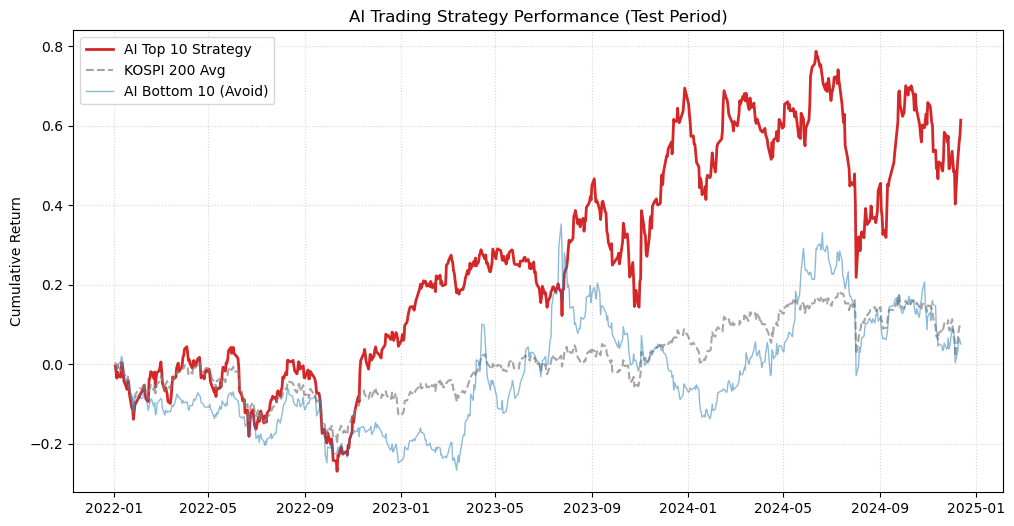

In [10]:
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. 테스트 데이터에 예측 점수 입히기
# -----------------------------------------------------------
# 경고 방지를 위해 복사본 생성
backtest_df = test.copy()

# 학습된 모델로 '예측(점수)' 실행
backtest_df['pred_score'] = model.predict(backtest_df[features])

# -----------------------------------------------------------
# 2. 일별 시뮬레이션 (Daily Loop)
# -----------------------------------------------------------
daily_log = []
unique_dates = sorted(backtest_df['date'].unique())

print(f"백테스트 기간: {unique_dates[0]} ~ {unique_dates[-1]}")
print("시뮬레이션 진행 중...", end="")

for d in unique_dates:
    # 하루치 데이터 추출
    day_data = backtest_df[backtest_df['date'] == d]
    
    # 데이터가 너무 적은 날(휴장일 전후 등)은 건너뜀
    if len(day_data) < 20:
        continue
        
    # [전략] AI 점수가 높은 상위 10개 종목 매수
    # ascending=False : 점수가 높은 순서대로 정렬
    top_10 = day_data.sort_values(by='pred_score', ascending=False).head(10)
    
    # [비교] AI 점수가 낮은 하위 10개 종목 (피해야 할 종목)
    bottom_10 = day_data.sort_values(by='pred_score', ascending=True).head(10)
    
    # 수익률 계산 (Next Day Return 사용)
    # 이미 Feature 생성 단계에서 next_day_ret(내일 수익률)을 만들어뒀음
    strategy_ret = top_10['next_day_ret'].mean()
    bottom_ret = bottom_10['next_day_ret'].mean()
    market_ret = day_data['next_day_ret'].mean() # 벤치마크 (KOSPI 200 평균)

    # 거래비용 반영 (선택사항: 슬리피지/수수료 0.15% 가정)
    # cost = 0.0015
    # strategy_ret -= cost
    
    daily_log.append({
        'date': d,
        'Top10_Strategy': strategy_ret,
        'Bottom10_Avoid': bottom_ret,
        'Benchmark': market_ret
    })

print(" 완료!")

# 결과 데이터프레임 변환
res = pd.DataFrame(daily_log).set_index('date')
res = res.fillna(0) # 결측치 0 처리

# -----------------------------------------------------------
# 3. 성과 지표 계산 (CAGR, Sharpe, MDD)
# -----------------------------------------------------------
# (1) 누적 수익률 그래프용 데이터 ((1+r) 누적 곱)
cum_ret = (1 + res).cumprod() - 1

# (2) 연환산 수익률 (CAGR)
total_days = len(res)
final_ret = cum_ret.iloc[-1]
cagr = (1 + final_ret) ** (252 / total_days) - 1

# (3) 샤프 지수 (Sharpe Ratio) - 무위험 이자율 0% 가정
# 연율화(Annualized)를 위해 sqrt(252) 곱함
daily_std = res.std()
sharpe = (res.mean() / daily_std) * np.sqrt(252)

# (4) 최대 낙폭 (MDD)
# 최고점(Peak) 대비 현재 얼마나 떨어졌나
wealth_index = (1 + res).cumprod()
peak = wealth_index.cummax()
drawdown = (wealth_index - peak) / peak
mdd = drawdown.min()

# -----------------------------------------------------------
# 4. 최종 결과 출력
# -----------------------------------------------------------
print(f"\n=== 백테스트 최종 성과 (2022.01 ~ 2024.12) ===")
print("-" * 65)
print(f"{'구분':<15} | {'누적 수익률':<10} | {'연환산(CAGR)':<10} | {'Sharpe':<8} | {'MDD':<8}")
print("-" * 65)

metrics = ['Top10_Strategy', 'Benchmark', 'Bottom10_Avoid']
labels = ['AI Top 10', 'Market(BM)', 'AI Bottom 10']

for col, label in zip(metrics, labels):
    print(f"{label:<15} | "
          f"{final_ret[col]*100:>9.1f}% | "
          f"{cagr[col]*100:>9.1f}% | "
          f"{sharpe[col]:>8.2f} | "
          f"{mdd[col]*100:>7.1f}%")
print("-" * 65)

# -----------------------------------------------------------
# 5. 시각화 (그래프)
# -----------------------------------------------------------
plt.figure(figsize=(12, 6))

# 주요 전략 (빨간색 굵게)
plt.plot(cum_ret.index, cum_ret['Top10_Strategy'], label='AI Top 10 Strategy', color='#d62728', linewidth=2)

# 시장 평균 (회색 점선)
plt.plot(cum_ret.index, cum_ret['Benchmark'], label='KOSPI 200 Avg', color='gray', linestyle='--', alpha=0.7)

# 하위 종목 (파란색 얇게 - 모델이 거르라고 한 종목들)
plt.plot(cum_ret.index, cum_ret['Bottom10_Avoid'], label='AI Bottom 10 (Avoid)', color='#1f77b4', linewidth=1, alpha=0.5)

plt.title('AI Trading Strategy Performance (Test Period)')
plt.ylabel('Cumulative Return')
plt.grid(True, linestyle=':', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
def get_ranking_by_date(date_str):
    """
    'YYYY-MM-DD' 형식의 날짜를 입력받아 그날의 AI 추천 순위를 출력합니다.
    예: get_ranking_by_date('2024-01-02')
    """
    # 1. 날짜 변환
    try:
        target_date = pd.to_datetime(date_str)
    except:
        print("날짜 형식이 올바르지 않습니다. '2024-01-02' 형태로 입력해주세요.")
        return

    # 2. 해당 날짜 데이터 추출
    # 전체 데이터 df에서 해당 날짜만 뽑습니다.
    daily_df = df[df['date'] == target_date].copy()
    
    # 3. 데이터 유무 확인 (휴장일 체크)
    if daily_df.empty:
        print(f"🚨 {date_str}은 데이터가 없습니다. (주말이거나 공휴일/휴장일일 수 있습니다)")
        return

    # 4. Feature가 비어있는 종목 제외 (계산 불가)
    daily_df = daily_df.dropna(subset=features)
    
    if daily_df.empty:
        print("데이터는 있지만, 필요한 지표(이동평균 등)가 부족하여 계산할 수 없습니다.")
        return

    # 5. AI 예측 실행 (점수 산출)
    # 학습된 model을 이용해 점수를 매깁니다.
    daily_df['AI_Score'] = model.predict(daily_df[features])

    # 6. 랭킹 산정 (점수 높은 순)
    ranking_df = daily_df.sort_values(by='AI_Score', ascending=False)
    ranking_df['Rank'] = range(1, len(ranking_df) + 1)
    
    # 7. 결과 출력
    print(f"\n📅 [{date_str}] KOSPI 200 AI 추천 랭킹 TOP 20")
    print("=" * 60)
    # 보고 싶은 컬럼들
    cols = ['Rank', 'ticker', '종가', '등락률', 'AI_Score', 'rsi_14', 'disparity_20']
    
    # 등락률이 있다면 %로 변환해서 보여주기 (없으면 제외)
    if '등락률' in ranking_df.columns:
        # 보기 좋게 포맷팅 (옵션)
        pass 
        
    display(ranking_df[cols].head(20))
    
    # (선택) 하위 종목도 궁금하다면 주석 해제
    # print(f"\n💀 [{date_str}] AI 비추천(매도 시그널) 하위 10")
    # display(ranking_df[cols].tail(10))

# ========================================================
# ▼▼▼ 여기 날짜를 바꿔서 실행해 보세요! ▼▼▼
# ========================================================

# 예시 1: 2024년 새해 첫 거래일
get_ranking_by_date('2024-01-02')

# 예시 2: 과거 특정 시점 (코로나 하락장 등)
# get_ranking_by_date('2020-03-19')

In [11]:
# 1. 월별 첫 거래일 날짜만 추출
# 'Y'는 연말, 'M'은 월말 기준. 여기서는 각 달의 첫 거래일을 잡기 위해 그룹화
monthly_dates = backtest_df.groupby([backtest_df['date'].dt.year, backtest_df['date'].dt.month])['date'].min().values

print(f"총 리밸런싱 횟수: {len(monthly_dates)}회 (월 1회)")

monthly_log = []

# 월별 반복
for i in range(len(monthly_dates) - 1):
    buy_date = monthly_dates[i]       # 매수일 (이달 초)
    sell_date = monthly_dates[i+1]    # 매도일 (다음달 초)
    
    # 매수일의 데이터로 추천 종목 선정
    day_data = backtest_df[backtest_df['date'] == buy_date]
    
    # 데이터 부족 시 패스
    if len(day_data) < 20: continue
        
    # Top 10 선정
    top_10_tickers = day_data.sort_values(by='pred_score', ascending=False).head(10)['ticker'].tolist()
    
    # 수익률 계산: (매도일 종가 / 매수일 종가) - 1
    # 해당 종목들의 '한 달 간 수익률'을 계산해야 함
    
    # 매수일 가격
    buy_prices = backtest_df[(backtest_df['date'] == buy_date) & (backtest_df['ticker'].isin(top_10_tickers))].set_index('ticker')['종가']
    
    # 매도일 가격
    sell_prices = backtest_df[(backtest_df['date'] == sell_date) & (backtest_df['ticker'].isin(top_10_tickers))].set_index('ticker')['종가']
    
    # 수익률 계산 (매도일 가격이 있는 종목만 계산)
    valid_tickers = buy_prices.index.intersection(sell_prices.index)
    if len(valid_tickers) == 0: continue
        
    returns = (sell_prices[valid_tickers] / buy_prices[valid_tickers]) - 1
    month_ret = returns.mean() # 포트폴리오 수익률
    
    # 벤치마크(시장) 수익률 계산 (KOSPI 200 전체 평균)
    bm_buy = backtest_df[backtest_df['date'] == buy_date].set_index('ticker')['종가']
    bm_sell = backtest_df[backtest_df['date'] == sell_date].set_index('ticker')['종가']
    bm_valid = bm_buy.index.intersection(bm_sell.index)
    bm_ret = ((bm_sell[bm_valid] / bm_buy[bm_valid]) - 1).mean()

    monthly_log.append({
        'date': sell_date, # 수익 실현일 기준
        'Strategy_Ret': month_ret,
        'Benchmark_Ret': bm_ret
    })

# 결과 확인
monthly_res = pd.DataFrame(monthly_log).set_index('date')
print(f"월간 리밸런싱 누적 수익률: {((1 + monthly_res['Strategy_Ret']).cumprod().iloc[-1] - 1) * 100:.2f}%")

총 리밸런싱 횟수: 36회 (월 1회)
월간 리밸런싱 누적 수익률: -9.93%


총 리밸런싱 횟수: 36회 (2022~2024)
월간 시뮬레이션 진행 중... 완료!

=== [Monthly Rebalancing] 최종 성과 (수수료 0.2% 적용) ===
-----------------------------------------------------------------
구분              | 누적 수익률     | CAGR       | Sharpe   | MDD     
-----------------------------------------------------------------
AI Top 10       |     -16.1% |      -5.8% |    -0.03 |   -32.1%
Market(BM)      |       8.2% |       2.7% |     0.25 |   -15.2%
-----------------------------------------------------------------


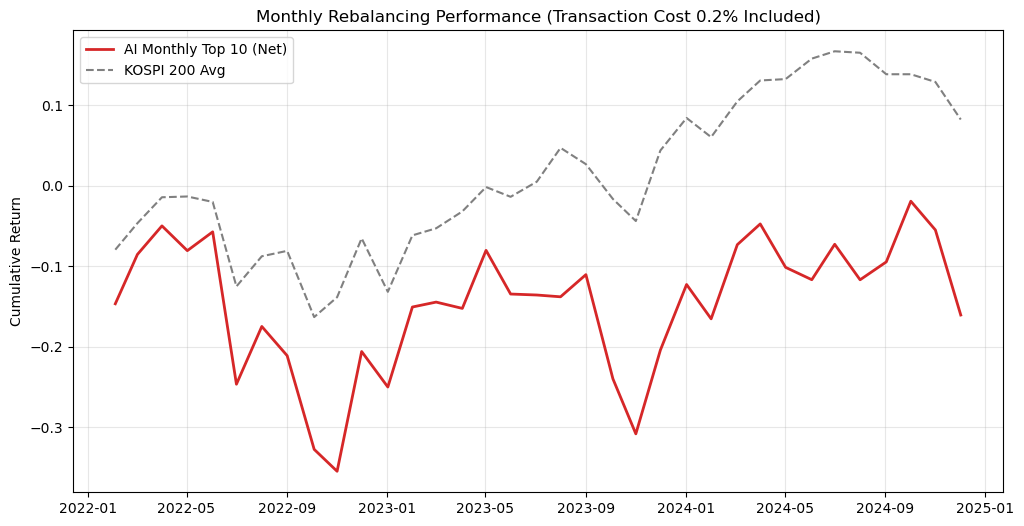

In [12]:
# 수수료 포함

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. 월별 리밸런싱 날짜 추출
# -----------------------------------------------------------
# 테스트 기간 데이터 복사
backtest_df = test.copy()

# 모델 예측 (이미 학습된 model 사용)
backtest_df['pred_score'] = model.predict(backtest_df[features])

# '년-월' 그룹의 첫 번째 날짜(매월 초)만 추출
monthly_dates = backtest_df.groupby([backtest_df['date'].dt.year, backtest_df['date'].dt.month])['date'].min().values
monthly_dates = sorted(monthly_dates) # 날짜순 정렬

print(f"총 리밸런싱 횟수: {len(monthly_dates)}회 (2022~2024)")

# -----------------------------------------------------------
# 2. 월간 수익률 시뮬레이션
# -----------------------------------------------------------
monthly_log = []
cost = 0.002  # 거래비용 0.2% (매수+매도 수수료 및 증권거래세 가정)

print("월간 시뮬레이션 진행 중...", end="")

for i in range(len(monthly_dates) - 1):
    buy_date = monthly_dates[i]       # 매수일 (이번 달 초)
    sell_date = monthly_dates[i+1]    # 매도일 (다음 달 초 -> 리밸런싱)
    
    # 1. 매수 시점의 데이터 (종목 선정용)
    buy_data = backtest_df[backtest_df['date'] == buy_date]
    
    # 데이터 부족 시 건너뜀
    if len(buy_data) < 20: continue
        
    # 2. AI 추천 Top 10 선정
    top_10_tickers = buy_data.sort_values(by='pred_score', ascending=False).head(10)['ticker'].tolist()
    
    # 3. 수익률 계산 (매도일 종가 / 매수일 종가 - 1)
    # 해당 기간 동안 보유했다고 가정
    
    # 매수 가격 (Buy Date의 종가)
    buy_prices = backtest_df[
        (backtest_df['date'] == buy_date) & 
        (backtest_df['ticker'].isin(top_10_tickers))
    ].set_index('ticker')['종가']
    
    # 매도 가격 (Sell Date의 종가)
    sell_prices = backtest_df[
        (backtest_df['date'] == sell_date) & 
        (backtest_df['ticker'].isin(top_10_tickers))
    ].set_index('ticker')['종가']
    
    # 교집합 종목만 계산 (혹시 거래정지 등으로 데이터 없으면 제외)
    valid_tickers = buy_prices.index.intersection(sell_prices.index)
    
    if len(valid_tickers) > 0:
        # 개별 종목 수익률
        rets = (sell_prices[valid_tickers] / buy_prices[valid_tickers]) - 1
        
        # 포트폴리오 수익률 (동일 비중) - 수수료 차감!
        port_ret = rets.mean() - cost
    else:
        port_ret = 0.0

    # 4. 벤치마크(시장) 수익률 계산 (KOSPI 200 전체 평균)
    bm_buy = backtest_df[backtest_df['date'] == buy_date].set_index('ticker')['종가']
    bm_sell = backtest_df[backtest_df['date'] == sell_date].set_index('ticker')['종가']
    bm_valid = bm_buy.index.intersection(bm_sell.index)
    bm_ret = ((bm_sell[bm_valid] / bm_buy[bm_valid]) - 1).mean() # BM은 수수료 없음 가정

    monthly_log.append({
        'date': sell_date,
        'Strategy_Ret': port_ret,
        'Benchmark_Ret': bm_ret
    })

print(" 완료!")

# 결과 정리
res = pd.DataFrame(monthly_log).set_index('date')

# -----------------------------------------------------------
# 3. 성과 지표 계산
# -----------------------------------------------------------
# 누적 수익률
cum_ret = (1 + res).cumprod() - 1

# 연환산 수익률 (CAGR) - 월간 데이터이므로 len(res)는 개월 수
months = len(res)
final_ret = cum_ret.iloc[-1]
cagr = (1 + final_ret) ** (12 / months) - 1

# Sharpe Ratio (월간 수익률 기반 -> 연율화 위해 sqrt(12) 곱함)
monthly_std = res.std()
sharpe = (res.mean() / monthly_std) * np.sqrt(12)

# MDD
wealth_index = (1 + res).cumprod()
peak = wealth_index.cummax()
mdd = ((wealth_index - peak) / peak).min()

# -----------------------------------------------------------
# 4. 결과 출력 및 시각화
# -----------------------------------------------------------
print(f"\n=== [Monthly Rebalancing] 최종 성과 (수수료 0.2% 적용) ===")
print("-" * 65)
print(f"{'구분':<15} | {'누적 수익률':<10} | {'CAGR':<10} | {'Sharpe':<8} | {'MDD':<8}")
print("-" * 65)

print(f"{'AI Top 10':<15} | "
      f"{final_ret['Strategy_Ret']*100:>9.1f}% | "
      f"{cagr['Strategy_Ret']*100:>9.1f}% | "
      f"{sharpe['Strategy_Ret']:>8.2f} | "
      f"{mdd['Strategy_Ret']*100:>7.1f}%")

print(f"{'Market(BM)':<15} | "
      f"{final_ret['Benchmark_Ret']*100:>9.1f}% | "
      f"{cagr['Benchmark_Ret']*100:>9.1f}% | "
      f"{sharpe['Benchmark_Ret']:>8.2f} | "
      f"{mdd['Benchmark_Ret']*100:>7.1f}%")
print("-" * 65)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(cum_ret.index, cum_ret['Strategy_Ret'], label='AI Monthly Top 10 (Net)', color='#d62728', linewidth=2)
plt.plot(cum_ret.index, cum_ret['Benchmark_Ret'], label='KOSPI 200 Avg', color='gray', linestyle='--')
plt.title('Monthly Rebalancing Performance (Transaction Cost 0.2% Included)')
plt.ylabel('Cumulative Return')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Train 데이터: 186,357
Validation 데이터: 89,832
Test 데이터: 141,122

--- 모델 학습 시작 ---
[0]	validation_0-rmse:0.28823	validation_1-rmse:0.28752
[98]	validation_0-rmse:0.28610	validation_1-rmse:0.28738

최적 반복 횟수: 48

=== 최종 모델 성능 ===
Test Spearman IC (rank correlation): 0.0259
(0.05 이상이면 의미 있는 퀀트 신호로 간주됨)


c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49692 (\N{HANGUL SYLLABLE SUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rkdtk\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

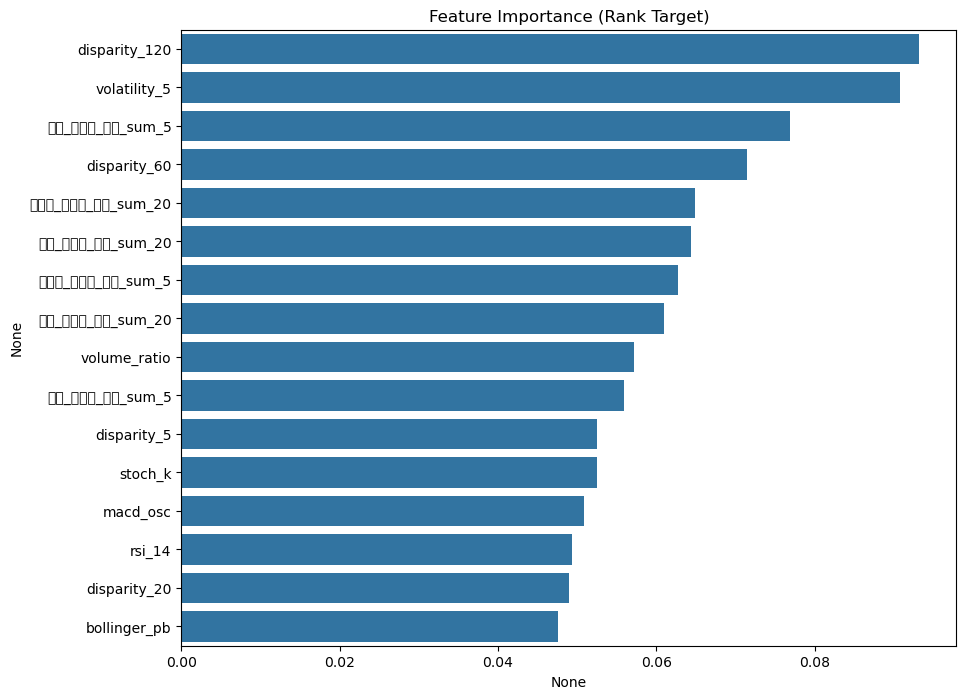

In [14]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------
# 1. y값 생성 (10일 수익률 → 날짜별 순위로 변환)
# -----------------------------------------------------------
# 10일 후 미래 가격 / 오늘 가격 - 1
df['target_10d'] = df.groupby('ticker')['종가'].shift(-10) / df['종가'] - 1

# 날짜별로 10일 수익률의 "순위(rank)" 를 생성 (0~1 사이)
# pct=True → 상대순위(percentile rank)
df['target_rank'] = df.groupby('date')['target_10d'].rank(pct=True)

# 결측치 제거
features = [
    'disparity_5', 'disparity_20', 'disparity_60', 'disparity_120',
    'rsi_14', 'macd_osc', 'stoch_k', 'bollinger_pb', 'volatility_5',
    '외국인_순매수_금액_sum_5', '외국인_순매수_금액_sum_20',
    '기관_순매수_금액_sum_5', '기관_순매수_금액_sum_20',
    '개인_순매수_금액_sum_5', '개인_순매수_금액_sum_20',
    'volume_ratio'
]

model_df = df.dropna(subset=features + ['target_rank'])

# -----------------------------------------------------------
# 2. Train / Validation / Test split
# -----------------------------------------------------------
train = model_df[model_df['date'].between('2015-01-01', '2019-12-31')]
val   = model_df[model_df['date'].between('2020-01-01', '2021-12-31')]
test  = model_df[model_df['date'].between('2022-01-01', '2024-12-31')]

print(f"Train 데이터: {len(train):,}")
print(f"Validation 데이터: {len(val):,}")
print(f"Test 데이터: {len(test):,}")

# X, y 정의 (y = rank)
X_train, y_train = train[features], train['target_rank']
X_val,   y_val   = val[features],   val['target_rank']
X_test,  y_test  = test[features],  test['target_rank']

# -----------------------------------------------------------
# 3. XGBoost 모델 학습 (Early Stopping 포함)
# -----------------------------------------------------------
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    early_stopping_rounds=50
)

print("\n--- 모델 학습 시작 ---")
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=100
)

print(f"\n최적 반복 횟수: {model.best_iteration}")

# -----------------------------------------------------------
# 4. Test 예측 + 성능 평가 (IC)
# -----------------------------------------------------------
y_pred = model.predict(X_test)

# 순위 기반 IC (Spearman rank correlation)
test_result = pd.DataFrame({'actual_rank': y_test, 'pred_rank': y_pred})
ic = test_result.corr(method='spearman').iloc[0, 1]

print("\n=== 최종 모델 성능 ===")
print(f"Test Spearman IC (rank correlation): {ic:.4f}")
print("(0.05 이상이면 의미 있는 퀀트 신호로 간주됨)")

# -----------------------------------------------------------
# 5. Feature Importance 시각화
# -----------------------------------------------------------
plt.figure(figsize=(10, 8))
imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=imp, y=imp.index)
plt.title('Feature Importance (Rank Target)')
plt.show()


전략 기간: 2022-01-03T00:00:00.000000000 ~ 2024-12-02T00:00:00.000000000
총 리밸런싱 횟수: 36회

=== [Rank Model] 월간 백테스트 결과 (Cost 0.2%) ===
AI Top 10 누적 수익률: -15.30%
시장(BM) 누적 수익률 : 8.20%
AI Bottom 10 수익률  : 39.31%


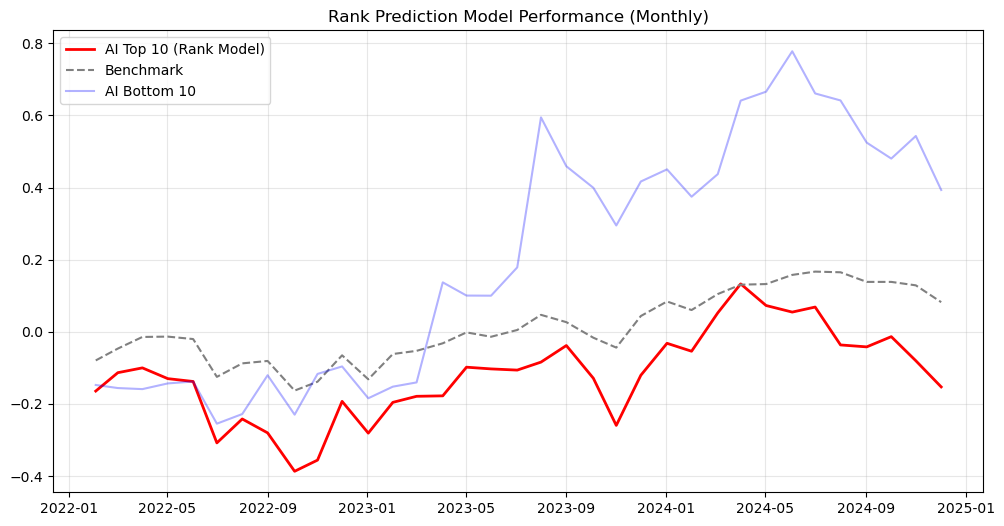

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 1. 월별 리밸런싱 날짜 추출 (Test 기간)
# -----------------------------------------------------------
# Test 데이터 복사
backtest_df = test.copy()

# [중요] Rank 학습된 모델로 예측 (결과는 0~1 사이의 순위 점수)
backtest_df['pred_rank'] = model.predict(backtest_df[features])

# 월초 날짜 추출
monthly_dates = backtest_df.groupby([backtest_df['date'].dt.year, backtest_df['date'].dt.month])['date'].min().values
monthly_dates = sorted(monthly_dates)

print(f"전략 기간: {monthly_dates[0]} ~ {monthly_dates[-1]}")
print(f"총 리밸런싱 횟수: {len(monthly_dates)}회")

# -----------------------------------------------------------
# 2. 월간 수익률 시뮬레이션 (수수료 0.2% 적용)
# -----------------------------------------------------------
monthly_log = []
cost = 0.002  # 0.2% (세금/수수료)

for i in range(len(monthly_dates) - 1):
    buy_date = monthly_dates[i]       # 매수일
    sell_date = monthly_dates[i+1]    # 매도일
    
    # 매수일 데이터
    buy_data = backtest_df[backtest_df['date'] == buy_date]
    if len(buy_data) < 20: continue
        
    # [전략] 예측 순위(pred_rank)가 높은 상위 10개 종목 선정
    top_10_tickers = buy_data.sort_values(by='pred_rank', ascending=False).head(10)['ticker'].tolist()
    
    # [비교] 하위 10개 (Short 관점)
    bottom_10_tickers = buy_data.sort_values(by='pred_rank', ascending=True).head(10)['ticker'].tolist()
    
    # 수익률 계산 함수
    def get_period_return(tickers, b_date, s_date):
        b_prices = backtest_df[(backtest_df['date'] == b_date) & (backtest_df['ticker'].isin(tickers))].set_index('ticker')['종가']
        s_prices = backtest_df[(backtest_df['date'] == s_date) & (backtest_df['ticker'].isin(tickers))].set_index('ticker')['종가']
        valid = b_prices.index.intersection(s_prices.index)
        if len(valid) == 0: return 0.0
        return ((s_prices[valid] / b_prices[valid]) - 1).mean()

    # 전략 수익률 (수수료 차감)
    strategy_ret = get_period_return(top_10_tickers, buy_date, sell_date) - cost
    
    # 하위 수익률 (수수료 차감)
    bottom_ret = get_period_return(bottom_10_tickers, buy_date, sell_date) - cost
    
    # 벤치마크 수익률 (KOSPI 200 전체)
    all_tickers = buy_data['ticker'].tolist()
    bm_ret = get_period_return(all_tickers, buy_date, sell_date)

    monthly_log.append({
        'date': sell_date,
        'Strategy_Top10': strategy_ret,
        'Strategy_Bottom10': bottom_ret,
        'Benchmark': bm_ret
    })

# 결과 정리
res = pd.DataFrame(monthly_log).set_index('date')

# -----------------------------------------------------------
# 3. 성과 지표 및 시각화
# -----------------------------------------------------------
cum_ret = (1 + res).cumprod() - 1
final_ret = cum_ret.iloc[-1]

print(f"\n=== [Rank Model] 월간 백테스트 결과 (Cost 0.2%) ===")
print(f"AI Top 10 누적 수익률: {final_ret['Strategy_Top10']*100:.2f}%")
print(f"시장(BM) 누적 수익률 : {final_ret['Benchmark']*100:.2f}%")
print(f"AI Bottom 10 수익률  : {final_ret['Strategy_Bottom10']*100:.2f}%")

# 그래프
plt.figure(figsize=(12, 6))
plt.plot(cum_ret.index, cum_ret['Strategy_Top10'], label='AI Top 10 (Rank Model)', color='red', linewidth=2)
plt.plot(cum_ret.index, cum_ret['Benchmark'], label='Benchmark', color='gray', linestyle='--')
plt.plot(cum_ret.index, cum_ret['Strategy_Bottom10'], label='AI Bottom 10', color='blue', alpha=0.3)
plt.title('Rank Prediction Model Performance (Monthly)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()